# 3. Solving Differential Equations with the Shooting Method
## A. The Angular Function

### Where we left off

We were left with the following equation to solve.

$$\frac{d }{d \eta}\left [ \left ( 1 - \eta^2 \right ) \frac{d S}{d \eta} \right ] + \left [ \Lambda -\frac{m^2}{1- \eta^2} -c^2\eta^2 \right ]S = 0$$

For reasons too unnecessary to explain (see Grivet for full explanation), the function $S(\eta)$ can be expressed with another function $f(\eta)$ in the following way. As we will see, it is $f(\eta)$ that will be solved numerically, and then and only then is $S(\eta)$ obtained.

$$S(\eta) = \left ( 1 - \eta^2 \right )^{m/2} f(\eta)$$

Substitution yields

$$\left ( 1 - \eta^2 \right ){f}'' -2\left ( m+1 \right )\eta{f}'-\left [ m\left (m+1  \right ) -\Lambda +c^2\eta^2 \right ]f=0$$

### Conditions on the function $f(\eta)$

Before we proceed with solving $f(\eta)$, we first look at the properties of $S(\eta)$ that will help us with $f(\eta)$. Two cases are possible with $S(\eta)$; it being symmetric (even function) (for example, $1\sigma_g \, / \, \sigma_{g1s}$) or it being antisymmetric (odd function) (for example, $1\sigma_u^* \, / \, \sigma_{u1s}^*$). This symmetry is inherited to $f(\eta)$ (as $\left ( 1 - \eta^2 \right )^{m/2}$ is an even function). We will exploit this symmetry by solving $f(\eta)$ for $0 \leq \eta \leq 1$ and then filling in the value of $f$ for $-1 \leq \eta \leq 0$ according to the desired symmetry.

We now tackle the initial values required to solve this differential equation. We arbitrarily choose $f(1)=1$ for convenience (TODO: explain?), and as this differential equation is a second-order ODE, we must first obtain the value of $f'(1)$. This can be obtained from the limiting form of the equation above when $\eta \to 1-$. 

$$f'(1) = \frac{m\left ( m+1 \right ) + c^2 - \Lambda}{2\left ( m+1 \right )}$$

We require that $f(\eta)$ to be a nice function; $f$ and $f'$ must be continuous at $-1 \leq \eta \leq 1$. Our area of interest is at $\eta = 0$. 

For the symmetric case ($f \text{ is even}$), 

$$\lim_{\eta \to 0-}f'(\eta) = \lim_{\eta \to 0+}f'(\eta) \text{ and } f'(-\eta) = - f'(\eta)$$

$$\therefore f'(0) = 0$$

For the antisymmetric case ($f \text{ is odd}$), 

$$\lim_{\eta \to 0-}f(\eta) = \lim_{\eta \to 0+}f(\eta) \text{ and } f(-\eta) = - f(\eta)$$

$$\therefore f(0) = 0$$

These are the constraints on the function $f(\eta)$

#### To summarize

For the symmetric case:

- $f(1) = 0$ and $f'(1) = \left [ m\left ( m+1 \right ) + c^2 - \Lambda \right ]/\left [ 2 \left ( m+1 \right ) \right ]$, which is dependent on $c^2$ and $\Lambda$
- Using a differential equation solver, we can numerically compute $f(\eta)$ in the domain of $0 \leq \eta \leq 1$, for any value of $c^2$ and $\Lambda$
- For select pairs of values of $c^2$ and $\Lambda$, $f'(0) = 0$. This $f(\eta)$ is the $f(\eta)$ we want.

The same applies to the antisymmetric case, except $f(0) = 0$ in the place of  $f'(0) = 0$.

### The shooting method for $f(\eta)$

It is time to realize this idea. For this example, we set $m=0$. Our goal is to find the appropriate value of $\lambda$ for a fixed value of $c^2 = -4$ (`c2` in the code below), to obtain a pair of values for $c^2$ and $\Lambda$ that satisfies $f'(0) = 0$ (symmetric) or $f(0) = 0$ (antisymmetric). 

For the symmetric case, let our first guess at $\lambda$ be $\lambda = -2$ (`lbda`). We will use `scipy.integrate.solve_ivp`, and below is a part of the documentation.

>This function numerically integrates a system of ordinary differential equations given an initial value:
>>```Python
>>dy / dt = f(t, y)
>>y(t0) = y0
>>```

We let `t` as $\eta$ (`eta`), and `y` as `p`, a 1D numpy array containing $f(\eta)$ and $f(\eta)$. Lastly, we let `f(t, y)` as function `F` returning a 1D numpy array containing $f'(\eta)$ and $f''(\eta)$.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# m, c^2, and lambda, as declared above
m = 0
c2 = -4.0
lbda = -2.0
is_even=True

$$\text{p in code} = \begin{bmatrix} f(\eta)\\ {f}'(\eta) \end{bmatrix}, \qquad \text{initial p} \left (\text{at }\eta=1  \right ) = \begin{bmatrix} f(1)\\ {f}'(1) \end{bmatrix} = \begin{bmatrix} 1\\ \frac{m\left ( m+1 \right ) + c^2 - \Lambda}{2\left ( m+1 \right )} \end{bmatrix}$$

In [2]:
# initial value of p, at eta = 1
p1 = np.array([1, ((m*(m+1) + c2 - lbda)/(2*(m+1)))])

As

$${f}'' = \frac{2\left ( m+1 \right )\eta{f}'+\left [ m\left (m+1  \right ) -\Lambda +c^2\eta^2 \right ]f}{1 - \eta^2}$$

$$\text{F in code} = \begin{bmatrix} f'(\eta)\\ f''(\eta) \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ \frac{2\left ( m+1 \right ) \eta}{ 1 - \eta^2 } & \frac{m\left ( m+1 \right ) - \Lambda +c^2\eta^2}{ 1 - \eta^2 }\end{bmatrix} \begin{bmatrix} f(\eta)\\ f'(\eta) \end{bmatrix}$$

Value of f'(0) for Lambda = -2.0: -0.41182


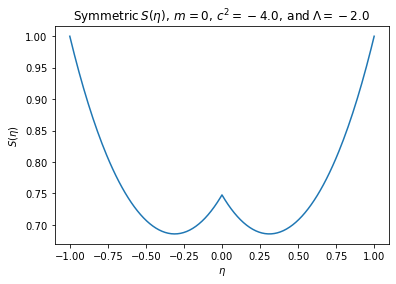

In [3]:
F = lambda eta, p: np.array([[0, 1], 
    [(m*(m+1) - lbda + c2*(eta**2))/(1 - eta**2), 2*(m+1)*eta/(1 - eta**2)]]) @ p

# obtain values of f(eta) along these points (we exclude eta=1 to avoid a divide-by-zero error)
eta_span = np.linspace(1, 0, 100)
eps = 1e-10 # a very small value
eta_span[0] = 1 - eps

# solve using solve_ivp, sol.y[0] is f(eta_span) and sol.y[1] is f'(eta_span)
sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=eta_span)
print(f"Value of f'(0) for Lambda = {lbda:.1f}: {sol.y[1, -1]:.5f}")

# we are plotting S(eta), not f(eta)
S_eta = ((1 - eta_span**2) ** (m/2)) * sol.y[0]

# add back eta=1 to eta_span
eta_span[0] = 1

# using symmetry (S(eta) is an even function) to construct S(eta) for -1 <= eta < 0
def finish_symmetry(arr, is_even=True):
    if is_even:
        sign = 1
    else:
        sign = -1
    return np.concatenate([sign * arr[:-1], arr[::-1]])

eta_span = finish_symmetry(eta_span, is_even=False)
S_eta_1st = finish_symmetry(S_eta, is_even=True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta_1st)
ax.set_title(r'$ \mathrm{Symmetric} \: S(\eta), \: m = 0, \:  c^2 = -4.0, \: \mathrm{and} \: \Lambda = -2.0$')
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');



It seems like we were not able to meet the constraint $f'(0) = 0$ as $f(0) \approx -0.412 $. Let's try a different value of $\lambda$. Before we do that, we'll make the above code into a function in order to rapidly repeat similar calculations.

In [4]:
def calculate_f_eta(m, c2, lbda, is_even=True):
    p1 = np.array([1, ((m*(m+1) + c2 - lbda)/(2*(m+1)))])
    
    F = lambda eta, p: np.array([[0, 1], 
    [(m*(m+1) - lbda + c2*(eta**2))/(1 - eta**2), 2*(m+1)*eta/(1 - eta**2)]]) @ p

    # obtain values of f(eta) along these points (we exclude eta=1 to avoid a divide-by-zero error)
    eta_span = np.linspace(1, 0, 100)
    eps = 1e-10 # a very small value
    eta_span[0] = 1 - eps

    # solve using solve_ivp, sol.y[0] is f(eta_span) and sol.y[1] is f'(eta_span)
    sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=eta_span)
    if is_even:
        print(f"Value of f'(0) for Lambda = {lbda:.4f}: {sol.y[1, -1]:.5f}")
    else:
        print(f"Value of f(0) for Lambda = {lbda:.4f}: {sol.y[0, -1]:.5f}")

    # we are plotting S(eta), not f(eta)
    S_eta = ((1 - eta_span**2) ** (m/2)) * sol.y[0]

    # add back eta=1 to eta_span
    eta_span[0] = 1

    eta_span = finish_symmetry(eta_span, is_even=False)
    S_eta = finish_symmetry(S_eta, is_even=is_even)
    
    return S_eta

We will try $\Lambda = -1.5$.

Value of f'(0) for Lambda = -1.5000: 0.08201


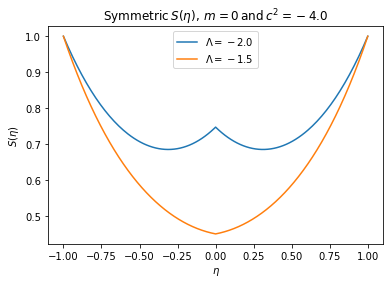

In [5]:
S_eta_2nd = calculate_f_eta(m, c2, -1.5, is_even=True)

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta_1st, label=r'$\Lambda = -2.0$')
ax.plot(eta_span, S_eta_2nd, label=r'$\Lambda = -1.5$')
ax.set_title(r'$ \mathrm{Symmetric} \: S(\eta), \: m = 0 \: \mathrm{and} \:  c^2 = -4.0 $')
ax.legend(loc=9)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

We were able to improve $f'(0)$ from -0.412 to 0.082, a bit higher than. For the next attempt, we will aim slightly lower, with $\Lambda = -1.7$. Ultimately, several more attempts are required to fine-tune $f'(0)$ to equal 0.

Value of f'(0) for Lambda = -1.7000: -0.09771
Value of f'(0) for Lambda = -1.5944: 0.00002


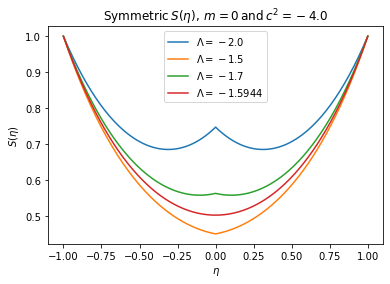

In [6]:
S_eta_3rd = calculate_f_eta(m, c2, -1.7, is_even=True)
# theoretially, repeating this process yields lambda = -1.594419579223602
S_eta_final = calculate_f_eta(m, c2, -1.5944, is_even=True)

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta_1st, label=r'$\Lambda = -2.0$')
ax.plot(eta_span, S_eta_2nd, label=r'$\Lambda = -1.5$')
ax.plot(eta_span, S_eta_3rd, label=r'$\Lambda = -1.7$')
ax.plot(eta_span, S_eta_final, label=r'$\Lambda = -1.5944$', )
ax.set_title(r'$ \mathrm{Symmetric} \: S(\eta), \: m = 0 \: \mathrm{and} \:  c^2 = -4.0 $')
ax.legend(loc=9)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

We were able to optimize $f'(0)$: $-0.412 \to 0.082 \to -0.098 \to \cdots \to 0.00002$, with a final result of $\Lambda = -1.5944$. However, instead of optimizing $f'(0)$ by hand, how about we optimize $f'(0)$ with another SciPy function, `scipy.optimize.fsolve`?

`fsolve` works by finding the root of a particular function by varying its input. In our usage case, we define a function `objective` with $\Lambda$ with its input and $f'(0)$ as its output.

Value of f(0) for Lambda = -1.1053: 0.25159
Value of f(0) for Lambda = -0.5053: 0.00000
Value of f(0) for Lambda = 0.0947: -0.19613


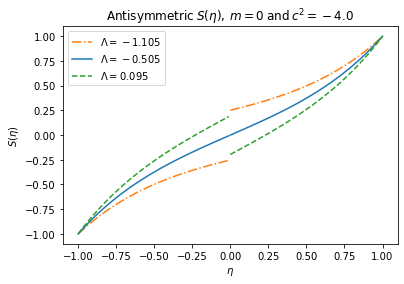

In [18]:
from scipy.optimize import fsolve

# antisymmetric
is_even = False

# note: the objective function must be able to take vectorized inputs for fsolve to work
@np.vectorize
def objective(lbda):
    p1 = np.array([1, ((m*(m+1) + c2 - lbda)/(2*(m+1)))])
    
    F = lambda eta, p: np.array([[0, 1], 
    [(m*(m+1) - lbda + c2*(eta**2))/(1 - eta**2), 2*(m+1)*eta/(1 - eta**2)]]) @ p

    # obtain values of f(eta) along these points (we exclude eta=1 to avoid a divide-by-zero error)
    eta_span = np.linspace(1, 0, 100)
    eps = 1e-10 # a very small value
    eta_span[0] = 1 - eps

    # evaluate f(0) or f'(0) only
    sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=[0])
    if is_even:
        return sol.y[1, -1]
    else:
        return sol.y[0, -1]
    
lbda_guess = -0.5 # initial guess   
lbda_final, = fsolve(objective, lbda_guess)

# evaluate S_eta of lbda_final -0.2, -0.1, 0. 0.1, 0.2
lbdas = np.linspace(-0.6, 0.6, 3) + lbda_final

fig, ax = plt.subplots()

colors = ['C1', 'C0', 'C2']
lss = ["-.", "-", "--"]

for ind, lbda in enumerate(lbdas):
    S_eta = calculate_f_eta(m, c2, lbda, is_even=is_even)
    lbda_label = r'$\Lambda = ' + f'{lbda:.3f}' + '$'
    # separated at eta = 0 to show discontinuity properly
    ax.plot(eta_span[:99], S_eta[:99], label=lbda_label, color=colors[ind], ls=lss[ind])
    ax.plot(eta_span[99:], S_eta[99:], color=colors[ind], ls=lss[ind])
ax.set_title(r'$ \mathrm{Antisymmetric} \: S(\eta), \: m = 0 \: \mathrm{and} \:  c^2 = -4.0 $')
ax.legend()
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

### A change in perspective

At this point, what is unclear is how we deal with $c^2$ and $\Lambda$. Going back to an earlier equation